In [61]:
from funciones import *
import matplotlib.pyplot as plt
from logger import *


"""
Metricas para SOLO VNS
"""

def error_relativo(valor_medio, mejor_valor):
    re = ( (valor_medio - mejor_valor) / mejor_valor) * 100
    return re

def coeficiente_variacion(std, mean):
    """
    generar histograma para cada problema 25,90,150
    """
    cv = (std / mean) * 100
    return cv


"""
Extrae datos del logger, calcula errores relativos y llama a funciones de visualización.

:param logger: instancia de Logger con .data cargado
:param valor_optimo_dict: diccionario con el mejor valor conocido por dataset, ej:
        {'tai25b.dat': 344355646, 'sko90b.dat': 115534, 'tai150b.dat': 498896643}
"""
logger = Logger("resultados/resultados.csv", False)

if logger.data is None:
    raise Exception("No se han cargado los datos del CSV")



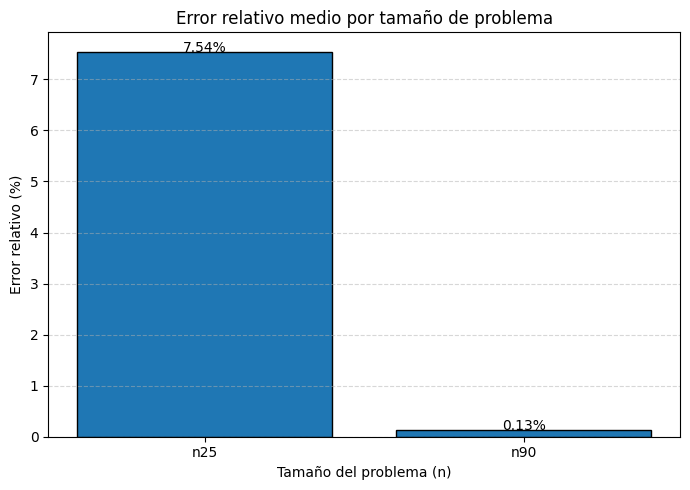

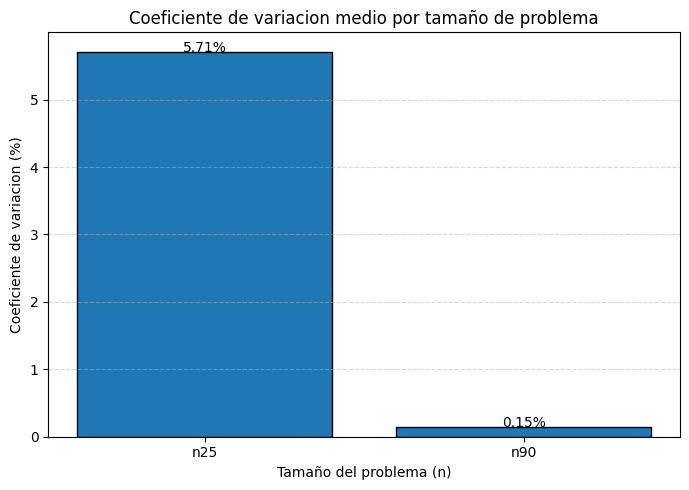

In [62]:
"""

GRAFICO BARRAS DEL ERROR RELATIVO Y COEFICIENTE DE VARIACION

"""
df_vns = logger.data[logger.data['Algoritmo'] == 'VNS']

vns_data = {
    'n25': df_vns[df_vns['Dataset'].str.contains("tai25")][['Costo', 'Evaluaciones']],
    'n90': df_vns[df_vns['Dataset'].str.contains("sko90")][['Costo', 'Evaluaciones']],
    'n150': df_vns[df_vns['Dataset'].str.contains("tai150")][['Costo', 'Evaluaciones']]
}

vns_stats = dict()
valores_er = []
valores_cv = []
xlabels = []
mean_evaluaciones = []

for clave, grupo in vns_data.items():
    
    costos = grupo['Costo'].astype(float).values  # Asegurar tipo numérico

    if len(costos) == 0:
        continue  # Saltar si no hay datos

    xlabels.append(clave)

    stats = {
        'n': clave,
        'mean': np.mean(costos),
        'std': np.std(costos),
        'minimum': np.min(costos),
        'maximum': np.max(costos)
    }
    
    mean_evaluaciones.append(np.mean(grupo['Evaluaciones'].astype(float).values))

    vns_stats[clave] = stats

    valores_er.append(error_relativo(stats['mean'], stats['minimum']))
    valores_cv.append(coeficiente_variacion(stats['std'], stats['mean']))

plt.figure(figsize=(7, 5))
plt.bar(xlabels, valores_er, edgecolor='black')
# Etiquetas y estilo
plt.title("Error relativo medio por tamaño de problema")
plt.xlabel("Tamaño del problema (n)")
plt.ylabel("Error relativo (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Etiquetas encima de las barras
for i, v in enumerate(valores_er):
    plt.text(i, v, f"{v:.2f}%", ha='center')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.bar(xlabels, valores_cv, edgecolor='black')
# Etiquetas y estilo
plt.title("Coeficiente de variacion medio por tamaño de problema")
plt.xlabel("Tamaño del problema (n)")
plt.ylabel("Coeficiente de variacion (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Etiquetas encima de las barras
for i, v in enumerate(valores_cv):
    plt.text(i, v, f"{v:.2f}%", ha='center')
plt.tight_layout()
plt.show()

Regresión log-log:
log(E) = -1.5419 + 3.5868 · log(n)
=> E ≈ exp(-1.5419) · n^3.5868


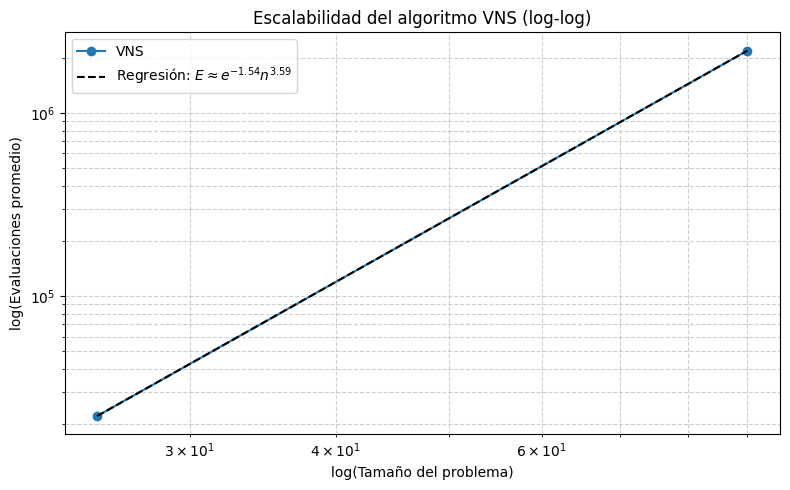

In [63]:
"""

GRAFICO ESCALABILIDAD
"""

S = np.array([25, 90])
E = np.array(mean_evaluaciones)

def ajustar_regresion_loglog(S, E):
    """
    Calcula los parámetros de regresión log-log: log(E) = _alpha + _beta * log(n)
    :param S: array de tamaños de problema (n)
    :param E: array de evaluaciones promedio
    :return: (alpha, beta)
    """
    logS = np.log(S)
    logE = np.log(E)

    # Ajuste lineal: log(E) = β·log(n) + α
    beta, alpha = np.polyfit(logS, logE, 1)

    print(f"Regresión log-log:")
    print(f"log(E) = {alpha:.4f} + {beta:.4f} · log(n)")
    print(f"=> E ≈ exp({alpha:.4f}) · n^{beta:.4f}")

    return alpha, beta

alpha, beta = ajustar_regresion_loglog(S, E)

"""
# Graficar
plt.figure(figsize=(8, 5))
plt.loglog(S, E, 'o-', label='VNS')
plt.xlabel("log(Tamaño del problema)")
plt.ylabel("log(Evaluaciones promedio)")
plt.title("Escalabilidad del algoritmo VNS (log-log)")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
"""

logS = np.log(S)
logE = np.log(E)
beta, alpha = np.polyfit(logS, logE, 1)
E_pred = np.exp(alpha) * S ** beta


# Gráfico con tu estilo
plt.figure(figsize=(8, 5))
plt.loglog(S, E, 'o-', label='VNS')  # puntos y líneas conectadas
plt.loglog(S, E_pred, 'k--', label=f'Regresión: $E \\approx e^{{{alpha:.2f}}} n^{{{beta:.2f}}}$')

plt.xlabel("log(Tamaño del problema)")
plt.ylabel("log(Evaluaciones promedio)")
plt.title("Escalabilidad del algoritmo VNS (log-log)")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
